### logistic regression solve multiple classification

In [192]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio #read in mat 
from scipy.optimize import minimize

In [147]:
data=sio.loadmat("ex3data1.mat")

In [148]:
data#dictionary

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [149]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [150]:
raw_X=data['X']# 获取key为X的所有的值
raw_Y=data['y']

In [151]:
print(raw_X.shape,raw_Y.shape)#5000 samples and 400 features(20 px *20)

(5000, 400) (5000, 1)


In [152]:
def plot_an_image(X):
    pick_one=np.random.randint(5000)#randint: randomly generate a int
    image=X[pick_one,:]
    fig,ax=plt.subplots(figsize=(1,1))
    ax.imshow(image.reshape(20,20).T,cmap='gray_r')#cause the image was shaped in one line we need to restore its shape
    plt.xticks([])
    plt.yticks([])#no tick

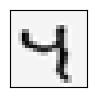

In [153]:
plot_an_image(raw_X)

In [154]:
def plot_100_image(X):
    sample_index=np.random.choice(len(X),100)
    images=X[sample_index,:]
    fig,ax=plt.subplots(ncols=10,nrows=10,figsize=(8,8),sharex=True,sharey=True)
    #ax.imshow(image.reshape(20,20).T,cmap='gray_r')#cause the image was shaped in one line we need to restore its shape
    for r in range(10):
        for c in range(10):
            ax[r,c].imshow(images[10*r+c].reshape(20,20).T,cmap='gray_r')
    plt.xticks([])
    plt.yticks([])#no tick
    plt.show

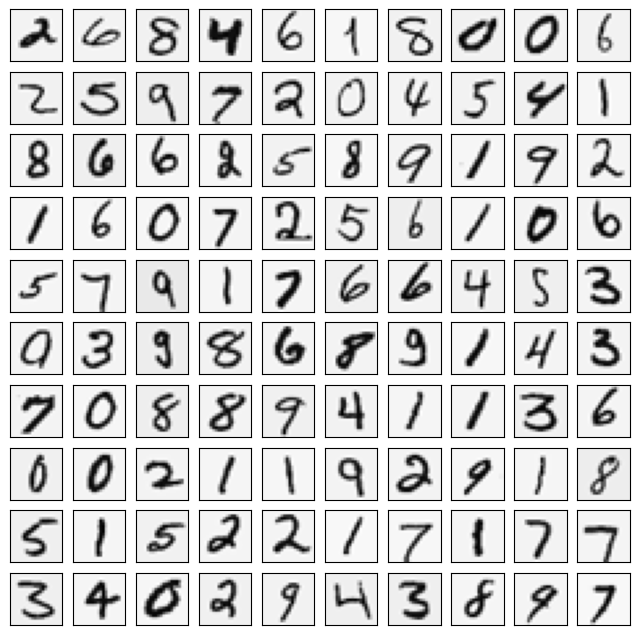

In [155]:
plot_100_image(raw_X)

In [156]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [174]:
def costFunction(X,y,theta,lam):
    y_hat=sigmoid(X@theta)
    first=y*np.log(y_hat)
    second =(1-y)*np.log(1-y_hat)
    reg=np.sum(np.power(theta[1:],2))*(lam/(2*len(X)))
    return -(np.sum(first+second))/len(X)+reg 

In [194]:
def gradient_reg(theta,X,y,lam):
    reg=theta[1:]*(lam/len(X))
    reg = np.insert(reg,0,values=0,axis=0)
    first=(X.T@(sigmoid(X@theta) - y))/len(X)
    return first+reg

In [196]:
X=np.insert(raw_X,0,values=1,axis=1)
X.shape

(5000, 401)

In [198]:
y=raw_Y.flatten()
y.shape

(5000,)

In [200]:

def one_vs_all(X,y,lamda,K):
    
    n = X.shape[1]
    
    theta_all = np.zeros((K,n))
    
    for i in range(1,K+1):
        theta_i = np.zeros(n,)
        
        res = minimize(fun =costFunction,
                      x0 = theta_i,
                      args = (X, y == i,lamda),
                      method = 'TNC',
                      jac =gradient_reg )
        theta_all[i-1,:] = res.x
        
    return theta_all

In [202]:
lam=1
K=10
theta_final=one_va_all(X,y,lam,K)

In [207]:
theta_final.shape


(10, 401)

In [209]:
def predict(X,theta_final):
    h=sigmoid(X@theta_final.T)#(5000,10)有10个概率需要返回最大的那个
    h_argmax=np.argmax(h,axis=1)#按照列去比较
    return h_argmax+1

In [213]:
y_pred=predict(X,theta_final)
acc=np.mean(y_pred == y)

In [215]:
acc

0.9446

### 使用神经网络实现手写字识别

In [218]:
theta=sio.loadmat('ex3weights.mat')
theta.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Theta1', 'Theta2'])

In [238]:
theta1=theta['Theta1']
theta2=theta['Theta2']
theta1.shape,theta2.shape

((25, 401), (10, 26))

In [240]:
a1=X
z2=X@theta1.T
a2=sigmoid(z2)
a2.shape

(5000, 25)

In [242]:
a2=np.insert(a2,0,values=1,axis=1)
a2.shape 
z3=a2 @ theta2.T
a3=sigmoid(z3)
a3.shape

(5000, 10)

In [252]:
y_pred=np.argmax(a3,axis=1)#沿着行比较每一列上面的
y_pred=y_pred+1

In [254]:
acc=np.mean(y_pred==y)
acc

0.9752